# 1. Import Library

In [4]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
# !pip install wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# 2. Membaca Data

In [5]:
data_train = pd.read_csv('indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t')
data_train.head()

,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive


In [7]:
data_train = pd.read_csv('indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_test = pd.read_csv('indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])
 
#mengambil 5 data teratas pada data train
data_train.head(5)

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


# 3. Analisis Data

In [8]:
# Melihat jumlah data pada data train dan test
 
print(data_train.shape)
print(data_test.shape)

(11000, 2)
(1260, 2)


In [9]:
# Menghitung jumlah data masing-masing variabel pada kolom Target
data_train['Target'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target'>

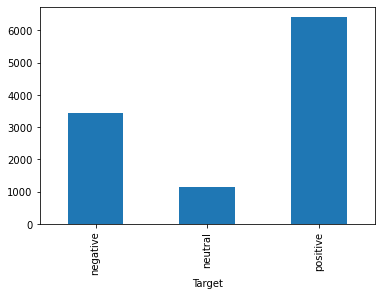

In [12]:
data_train.groupby('Target').size().plot(kind='bar')

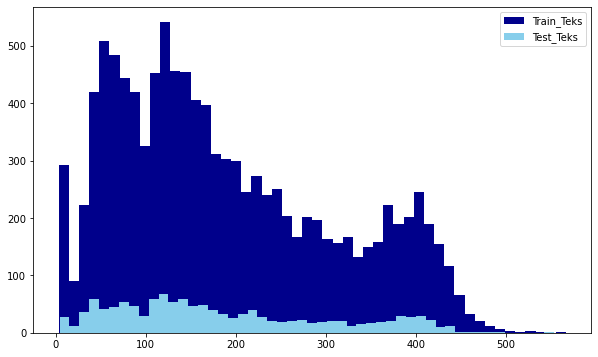

In [13]:
# Melihat panjang teks dalam data train dan data test
 
length_train = data_train['Teks'].str.len()
length_test = data_test['Teks'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()

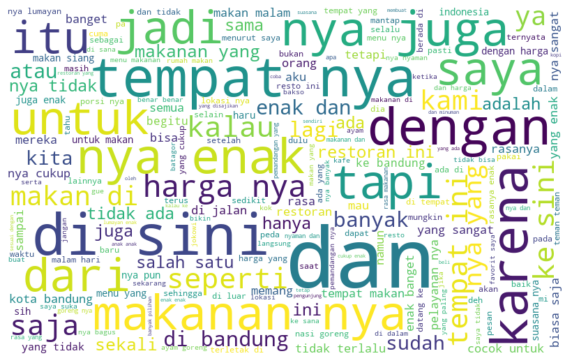

In [15]:
# Sentimen yang ada pada seluruh data train dapat dilihat dengan memahami kata yang umum dengan plot word cloud
 
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

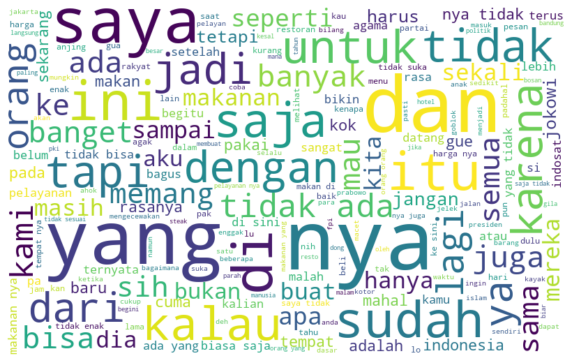

In [16]:
# Melihat kata-kata yang negatif
negative_words = ' '.join(text for text in data_train['Teks'][data_train['Target'] == 'negative']) 
wordCloud(negative_words)

# 4. Feature Engineering dengan TF-IDF

In [17]:
# Melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
 
train_vectors = vectorizer.fit_transform(data_train['Teks'])
test_vectors = vectorizer.transform(data_test['Teks'])

In [18]:
# melakukan klasifikasi dengan SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, data_train['Target'])
prediction_linear = classifier_linear.predict(test_vectors)

In [19]:
# print metriks
target_names = ['positive', 'negative', 'netral']
print(classification_report(data_test['Target'], prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.84       394
    negative       0.79      0.70      0.74       131
      netral       0.92      0.91      0.91       735

    accuracy                           0.87      1260
   macro avg       0.84      0.82      0.83      1260
weighted avg       0.87      0.87      0.87      1260



In [23]:
print(confusion_matrix(data_test['Target'], prediction_linear))

[[339  11  44]
 [ 24  92  15]
 [ 54  13 668]]


# 5. Prediksi Sentimen

In [29]:
teks = "Merasa kagum dengan toko ini tapi berubah menjadi kecewa setelah transaksi"
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['negative']
